# Getting Started with Matplotlib

Pandas uses `matplotlib` to create visualizations. Therefore, before we learn how to plot with `pandas`, it's important to understand how `matplotlib` works at a high-level, which is the focus of this notebook.


## About the Data
In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis))
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Setup
We need to import `matplotlib.pyplot` for plotting.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Plotting lines

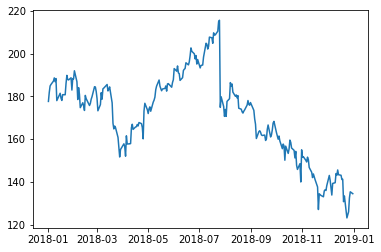

In [2]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

In [3]:
# me
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


<AxesSubplot: xlabel='date'>

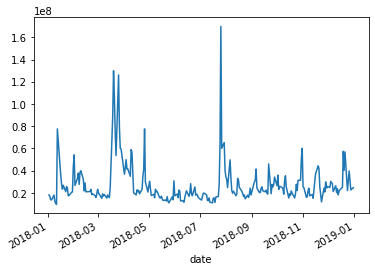

In [4]:
#me
fb.volume.plot()

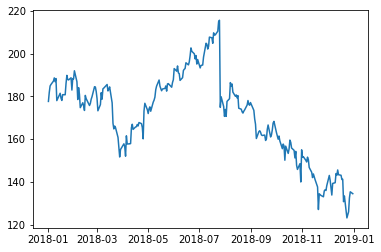

In [15]:
#me
plt.plot(fb.index, fb.open)

<AxesSubplot: xlabel='date'>

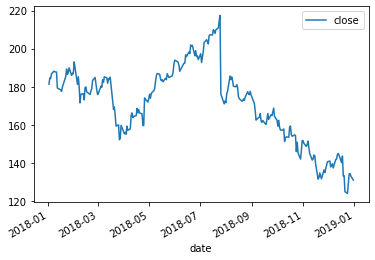

In [36]:
#me
fb.plot(kind='line', y='close')

Since we are working in a Jupyter notebook, we can use the magic command `%matplotlib inline` once and not have to call `plt.show()` for each plot.

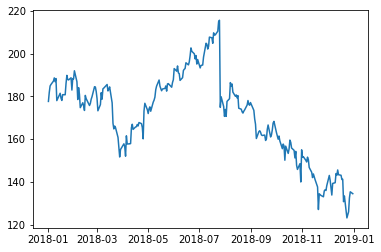

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

## Scatter plots

We can pass in a string specifying the style of the plot. This is of the form `[marker][linestyle][color]`. For example, we can make a black dashed line with `'--k'` or a red scatter plot with `'or'`:

<AxesSubplot: xlabel='open', ylabel='close'>

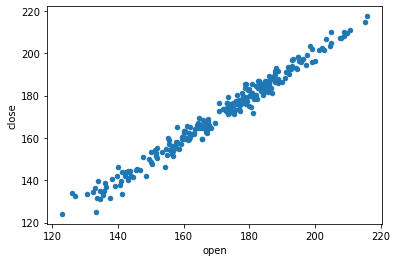

In [40]:
#me
#plt.plot(data='fb', kind='scatter', x='open', y='close' )
fb.plot( kind='scatter', x='open', y='close' )

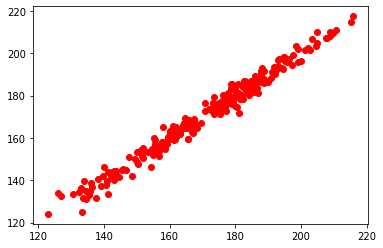

In [43]:
#me 
plt.plot(fb.open, fb.close, 'or' )

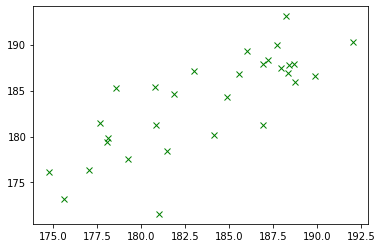

In [47]:
plt.plot('open', 'close', 'xg', data=fb.head(30))

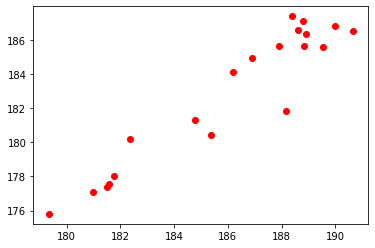

In [49]:
plt.plot('high', 'low', 'or', data=fb.head(20))

Here are some examples of how you make a format string:

| Marker | Linestyle | Color | Format String | Result |
| :---: | :---: | :---: | :---: | --- |
| | `-` | `b` | `-b` | blue solid line|
| `.` |  | `k` | `.k` | black points|
|  | `--` | `r` | `--r` | red dashed line|
| `o` | `-` | `g` | `o-g` | green solid line with circles|
| | `:` | `m` | `:m` | magenta dotted line|
|`x` | `-.` | `c` | `x-.c` | cyan dot-dashed line with x's|
 
Note that we can also use format strings of the form `[color][marker][linestyle]`, but the parsing by `matplotlib` (in rare cases) might not be what we were aiming for. Consult the *Notes* section in the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for the complete list of options.
## Histograms

In [51]:
#me
quakes = pd.read_csv('data/earthquakes.csv')
quakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


<AxesSubplot: >

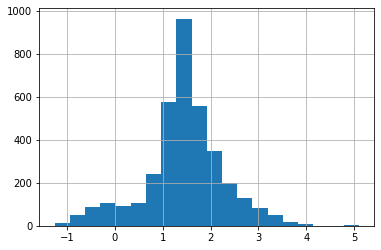

In [66]:
#me
quakes.query('magType=="ml" and parsed_place=="Alaska"').mag.hist(bins=20)

(array([1., 1., 2., 0., 0., 3., 0., 1., 1., 1.]),
 array([-0.18 , -0.043,  0.094,  0.231,  0.368,  0.505,  0.642,  0.779,
         0.916,  1.053,  1.19 ]),
 <BarContainer object of 10 artists>)

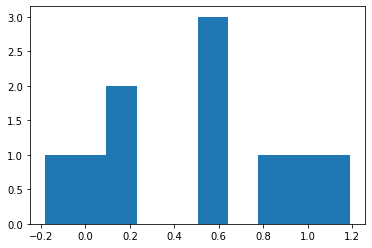

In [65]:
#me
plt.hist(quakes.query('magType=="md" and parsed_place=="Washington"').mag)

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

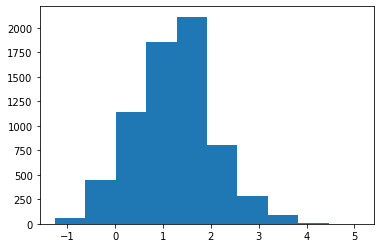

In [63]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

### Bin size matters
Notice how our assumptions of the distribution of the data can change based on the number of bins (look at the drop between the two highest peaks on the righthand plot):

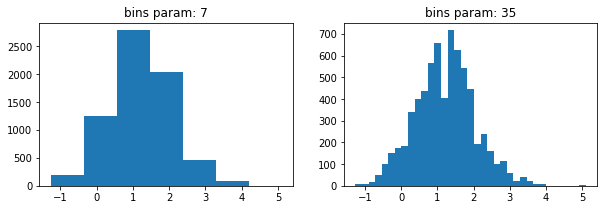

In [67]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

## Plot components
### `Figure`
Top-level object that holds the other plot components.

In [68]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [70]:
#me
fig = plt.figure(figsize=(2,5))

<Figure size 144x360 with 0 Axes>

In [71]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

### `Axes`
Individual plots contained within the `Figure`.

## Creating subplots
Simply specify the number of rows and columns to create:

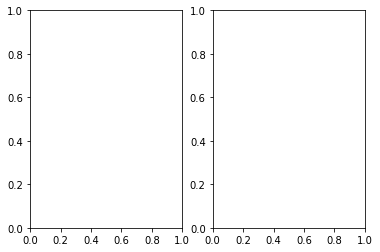

In [72]:
fig, axes = plt.subplots(1, 2)

As an alternative to using `plt.subplots()` we can add `Axes` objects to the `Figure` object on our own. This allows for some more complex layouts, such as picture in picture:

#### **The add_axes() method takes a list in the form of [left, bottom, width, height] as proportions of the figure dimensions, representing the area in the figure this subplot should occupy:**

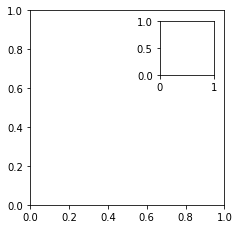

In [73]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

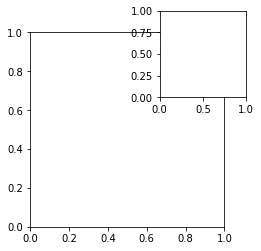

In [75]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.4, 0.4])

## Creating Plot Layouts with `gridspec`
We can create subplots with varying sizes as well:

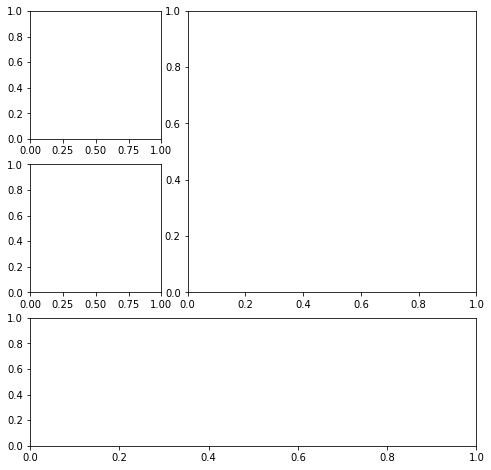

In [76]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

In [80]:
#?fig.add_gridspec

#### The layout calls are a little counterintuititve. 
#### They are row references followed by column references. So y X x instead of x X y. 

## Saving plots
Use `plt.savefig()` to save the last created plot. To save a specific `Figure` object, use its `savefig()` method.

In [81]:
fig.savefig('empty.png')

## Cleaning up
It's important to close resources when we are done with them. We use `plt.close()` to do so. If we pass in nothing, it will close the last plot, but we can pass in the specific `Figure` object to close or say `'all'` to close all `Figure` objects that are open. Let's close all the `Figure` objects that are open with `plt.close()`:

In [82]:
plt.close('all')

## Additional plotting options
### Specifying figure size
Just pass the `figsize` argument to `plt.figure()`. It's a tuple of `(width, height)`:

In [83]:
fig = plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

This can be specified when creating subplots as well:

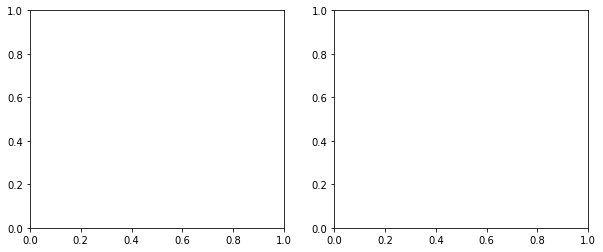

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

### `rcParams`
A small subset of all the available plot settings (shuffling to get a good variation of options):

In [85]:
import random
import matplotlib as mpl

rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['animation.convert_args',
 'axes.formatter.use_locale',
 'boxplot.flierprops.markeredgecolor',
 'boxplot.meanline',
 'boxplot.meanprops.linewidth',
 'boxplot.meanprops.markeredgecolor',
 'boxplot.medianprops.linewidth',
 'date.autoformatter.hour',
 'date.converter',
 'date.interval_multiples',
 'font.monospace',
 'grid.linestyle',
 'image.origin',
 'keymap.home',
 'legend.shadow',
 'path.simplify_threshold',
 'pgf.preamble',
 'xtick.minor.bottom',
 'ytick.labelcolor',
 'ytick.major.size']

We can check the current default `figsize` using `rcParams`:

In [86]:
mpl.rcParams['figure.figsize']

[6.0, 4.0]

We can also update this value to change the default (until the kernel is restarted):

In [87]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use `rcdefaults()` to restore the defaults. Note this is slightly different than before because running `%matplotlib inline` sets a different value for `figsize` ([see more](https://github.com/ipython/ipykernel/blob/master/ipykernel/pylab/config.py#L42-L56)). After we reset, we are going back to the default value of `figsize` before that import:

In [88]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

This can also be done via `pyplot`:

In [89]:
plt.rc('figure', figsize=(20, 20)) # change `figsize` default to (20, 20)
plt.rcdefaults() # reset the default

<hr>
<div>
    <a href="../ch_04/4-time_series.ipynb">
        <button>&#8592; Chapter 4</button>
    </a>
    <a href="./2-plotting_with_pandas.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>